In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

In [5]:
diabetes = pd.read_csv("diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


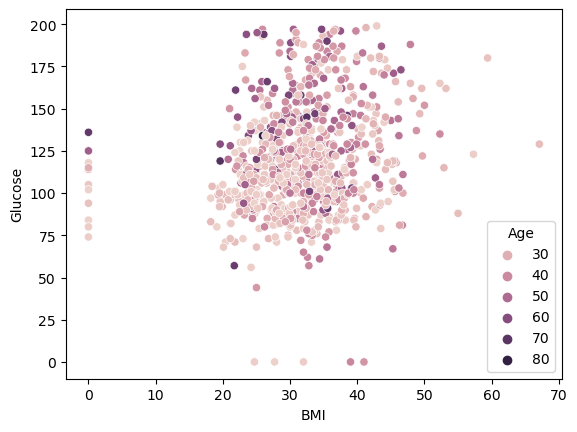

In [23]:
rel = sns.scatterplot(data=diabetes, x="BMI", y="Glucose", hue="Age")

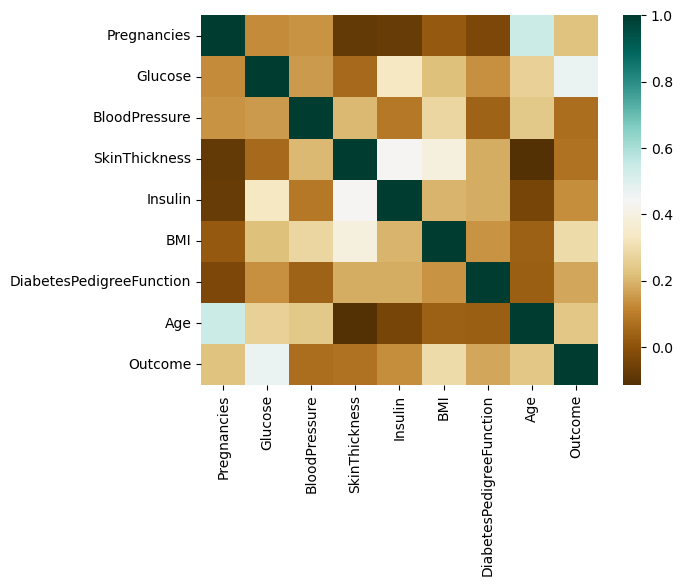

In [17]:
corr = sns.heatmap(diabetes.corr(),cmap="BrBG",annot=False)

In [6]:
X = diabetes.drop("Glucose", axis=1).values
y = diabetes["Glucose"].values
X_bmi = X[:, 6]
print(X_bmi.shape)

(768,)


In [7]:
X_bmi = X_bmi.reshape(-1, 1)
print(X_bmi.shape)

(768, 1)


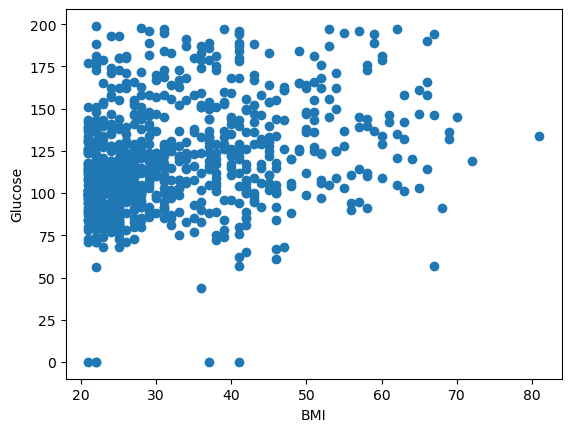

In [8]:
plt.scatter(X_bmi, y)
plt.ylabel("Glucose")
plt.xlabel("BMI")
plt.show()

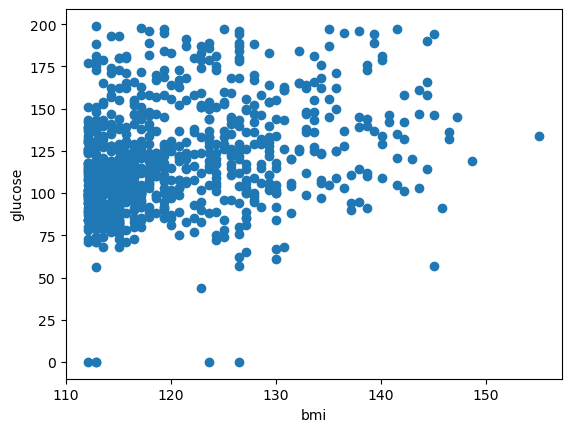

In [10]:
reg = LinearRegression()
reg.fit(X_bmi, y)
prediction = reg.predict(X_bmi)
plt.scatter(prediction, y)
plt.ylabel("glucose")
plt.xlabel("bmi")
plt.show()

In [18]:
reg.score(X_bmi, y)

0.06943979675248113

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size=0.2, random_state=15)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
reg_all.score(X_test, y_test)

0.3658127615857697

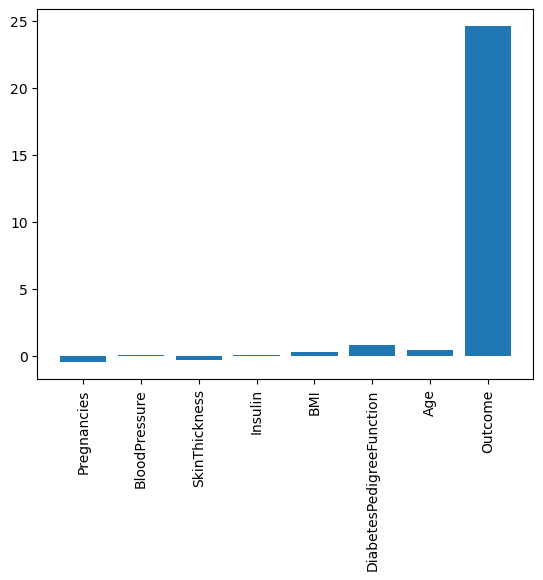

In [15]:
names = diabetes.drop("Glucose", axis=1).columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
plt.bar(names, lasso_coef)
plt.xticks(rotation=90)
plt.show()